# PROJECT TITLE: ONLINE PAYMENT FRAUD DETECTION

# Project Defination- Fraud detection is defined as a process that defects scams and prevents fraudsters from obtaining money or property through false means.

# Problem solving statement:The aim of this project is to predict online payment fraud.

# Import Important Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [72]:
data=pd.read_csv(r"C:\Users\dell\Documents\Online-Fraud-Dataset1.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,2,PAYMENT,12882.91,C18459190,20640.0,7757.09,M1310344955,0.0,0.0,0,0
2995,2,CASH_IN,71045.05,C1778257620,5724.0,76769.05,C1629687658,0.0,0.0,0,0
2996,2,PAYMENT,5769.55,C548093498,60891.0,55121.45,M1823438851,0.0,0.0,0,0
2997,2,PAYMENT,9633.82,C1889457907,6847.0,0.00,M1771040410,0.0,0.0,0,0


# To Check Shape

# We have 2999 rows and 11 columns in the dataset

In [73]:
data.shape

(2999, 11)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            2999 non-null   int64  
 1   type            2999 non-null   object 
 2   amount          2999 non-null   float64
 3   nameOrig        2999 non-null   object 
 4   oldbalanceOrg   2999 non-null   float64
 5   newbalanceOrig  2999 non-null   float64
 6   nameDest        2999 non-null   object 
 7   oldbalanceDest  2999 non-null   float64
 8   newbalanceDest  2999 non-null   float64
 9   isFraud         2999 non-null   int64  
 10  isFlaggedFraud  2999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 257.9+ KB


# Check dataset has any null value or not

In [75]:
# Missing Values
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2994,False,False,False,False,False,False,False,False,False,False,False
2995,False,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False,False


In [76]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: >

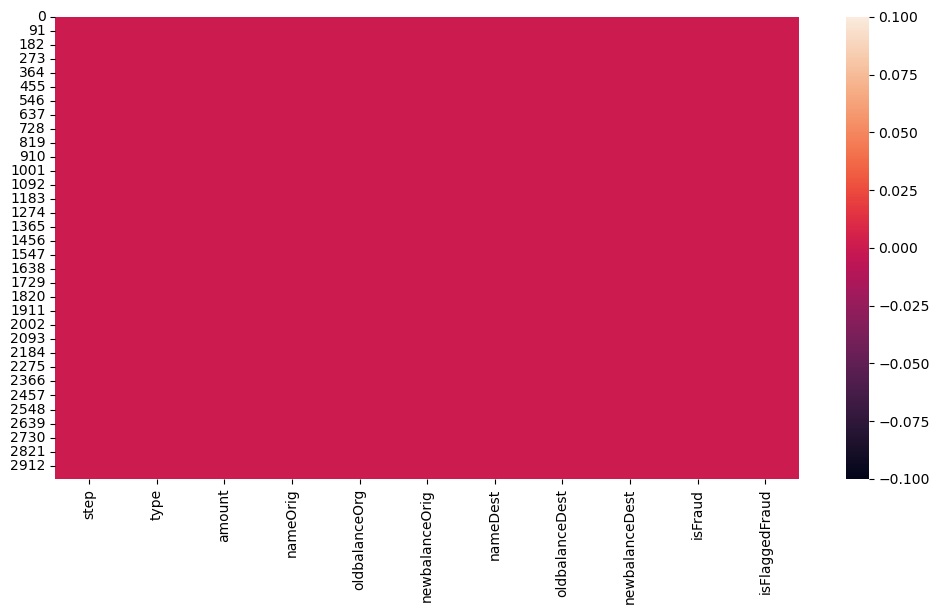

In [77]:
# to visulize missing vales
plt.figure(figsize=(12,6))
sns.heatmap(data.isnull())

# There is no missing value in the dataset

# Exploring transaction type


In [78]:
data.type.value_counts()

type
PAYMENT     1502
CASH_IN      652
CASH_OUT     397
TRANSFER     286
DEBIT        162
Name: count, dtype: int64

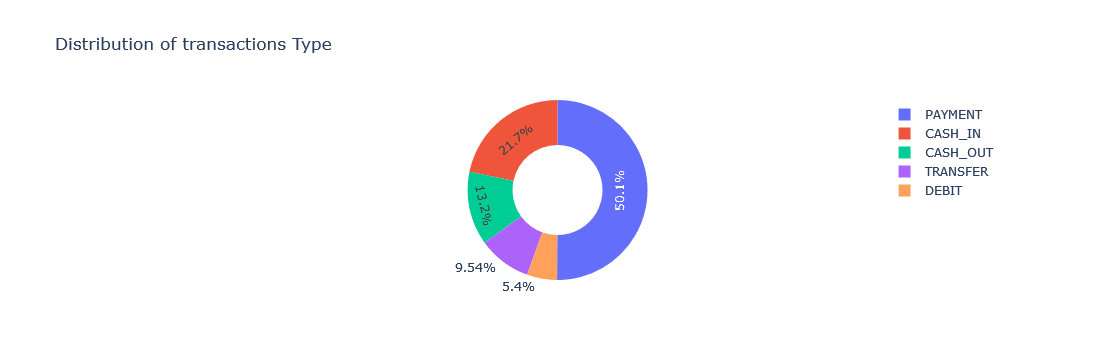

In [79]:
type = data["type"].value_counts()
transaction = type.index
quantity = type.values

import plotly.express as px
figure = px.pie( data,values=quantity,names=transaction, hole = 0.5,title="Distribution of transactions Type")
figure.show()

# Converting Categorical to Numerical Value

In [80]:
from sklearn.preprocessing import LabelEncoder  

In [81]:
label_encoder = LabelEncoder()

In [82]:
data['type'] = label_encoder.fit_transform(data['type'])
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,2,3,12882.91,C18459190,20640.0,7757.09,M1310344955,0.0,0.0,0,0
2995,2,0,71045.05,C1778257620,5724.0,76769.05,C1629687658,0.0,0.0,0,0
2996,2,3,5769.55,C548093498,60891.0,55121.45,M1823438851,0.0,0.0,0,0
2997,2,3,9633.82,C1889457907,6847.0,0.00,M1771040410,0.0,0.0,0,0


In [83]:
data['nameOrig'] = label_encoder.fit_transform(data['nameOrig'])
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,335,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,1056,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,460,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,2766,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,1691,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,2,3,12882.91,1341,20640.0,7757.09,M1310344955,0.0,0.0,0,0
2995,2,0,71045.05,1226,5724.0,76769.05,C1629687658,0.0,0.0,0,0
2996,2,3,5769.55,2302,60891.0,55121.45,M1823438851,0.0,0.0,0,0
2997,2,3,9633.82,1405,6847.0,0.00,M1771040410,0.0,0.0,0,0


In [84]:
data['nameDest'] = label_encoder.fit_transform(data['nameDest'])
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,335,170136.0,160296.36,1054,0.0,0.0,0,0
1,1,3,1864.28,1056,21249.0,19384.72,1106,0.0,0.0,0,0
2,1,4,181.00,460,181.0,0.00,208,0.0,0.0,1,0
3,1,1,181.00,2766,181.0,0.00,181,21182.0,0.0,1,0
4,1,3,11668.14,1691,41554.0,29885.86,457,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2994,2,3,12882.91,1341,20640.0,7757.09,516,0.0,0.0,0,0
2995,2,0,71045.05,1226,5724.0,76769.05,88,0.0,0.0,0,0
2996,2,3,5769.55,2302,60891.0,55121.45,942,0.0,0.0,0,0
2997,2,3,9633.82,1405,6847.0,0.00,895,0.0,0.0,0,0


# Checking correlation between the feature of data with the is Fraud column¶

In [85]:
# Checking correlation
correlation = data.corr()
print(correlation["isFraud"].sort_values(ascending = True))

nameDest         -0.060235
newbalanceOrig   -0.034502
oldbalanceOrg    -0.027748
nameOrig         -0.027700
oldbalanceDest   -0.024528
step             -0.024008
newbalanceDest   -0.006247
type              0.010079
amount            0.041064
isFraud           1.000000
isFlaggedFraud         NaN
Name: isFraud, dtype: float64


In [86]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

# Spliting the data

In [87]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (2999, 10)
Shape of y =  (2999,)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (2399, 10)
Shape of y_train =  (2399,)
Shape of X_test =  (600, 10)
Shape of y_test =  (600,)


# Standardrization

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Import Ml Algorithm and intilize them

# Logistic Regression

In [99]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=52)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test_scaled)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [100]:
classifier.score(X_test,y_test)

0.9916666666666667

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
def Classification_report(y_test,y_pred):
    print(f'confusion Matrix :\n{confusion_matrix(y_test,y_pred)}\n')
    print(f'Classification Report :\n {classification_report(y_test,y_pred)}\n')

Classification_report(y_test,y_pred)

confusion Matrix :
[[273 323]
 [  0   4]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.46      0.63       596
           1       0.01      1.00      0.02         4

    accuracy                           0.46       600
   macro avg       0.51      0.73      0.33       600
weighted avg       0.99      0.46      0.62       600




# K Nearest Neighbo Classification Model

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [122]:
classifier.score(X_test, y_test)

0.9933333333333333

In [127]:
def Classification_report(y_test,y_pred):
    print(f'confusion Matrix :\n{confusion_matrix(y_test,y_pred)}\n')
    print(f'Classification Report :\n {classification_report(y_test,y_pred)}\n')

Classification_report(y_test,y_pred)
    

confusion Matrix :
[[273 323]
 [  0   4]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.46      0.63       596
           1       0.01      1.00      0.02         4

    accuracy                           0.46       600
   macro avg       0.51      0.73      0.33       600
weighted avg       0.99      0.46      0.62       600




# Train Decision Tree Classfication Model

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
classifier.score(X_test, y_test)

0.99

In [126]:
def Classification_report(y_test,y_pred):
    print(f'confusion Matrix :\n{confusion_matrix(y_test,y_pred)}\n')
    print(f'Classification Report :\n {classification_report(y_test,y_pred)}\n')

Classification_report(y_test,y_pred)
    

confusion Matrix :
[[273 323]
 [  0   4]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.46      0.63       596
           1       0.01      1.00      0.02         4

    accuracy                           0.46       600
   macro avg       0.51      0.73      0.33       600
weighted avg       0.99      0.46      0.62       600




# Train Random Forest Classification Model

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train, y_train)
# n_estimator defualt value is 100

RandomForestClassifier()

In [112]:
classifier.score(X_test, y_test)

0.9933333333333333

In [129]:
def Classification_report(y_test,y_pred):
    print(f'confusion Matrix :\n{confusion_matrix(y_test,y_pred)}\n')
    print(f'Classification Report :\n {classification_report(y_test,y_pred)}\n')
    
Classification_report(y_test,y_pred)
    

confusion Matrix :
[[273 323]
 [  0   4]]

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.46      0.63       596
           1       0.01      1.00      0.02         4

    accuracy                           0.46       600
   macro avg       0.51      0.73      0.33       600
weighted avg       0.99      0.46      0.62       600




In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE",mean_absolute_error(y_test,y_pred))

In [116]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.5383333333333333


In [117]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.7337120234351713


In [118]:
from sklearn.metrics import r2_score

In [119]:
print("R_Squared",r2_score(y_test,y_pred))

R_Squared -80.29194630872486


# Interpretation Of Result

# Random Forest Best Suitable For My Model

# Random Forest Accuracy : 99.33%